# Worksheet 2.0.0: Image manipulation

<div class="alert alert-block alert-info">
    This worksheet implements to-do markers where work needs to be completed. In some cases, this means that you'll need to copy a line or two and make meaningful changes.
</div>

## `import` last week

If you recall last week's end-of-week takeaways about Python modules, you'll remember that:

* they exist to house functionality that programmers don't use _all the time_
* need to be `import`ed
* create _objects_ which we can use to perform specialized tasks
* modules have _methods_ which we access using _dot notation_
* the methods that a given model contains vary from module to module depending on purpose
* the professor suggests you read the internets to learn more about most modules
* G. Wiz and the crew thank you for playing HumanQuest; maybe you can play again sometime?

## Drawing on your experience

While there are quite a few modules provided by simply using Python, many of the _best_ are indepedently-developed, community-maintained efforts. This week, we're going to examine a module called `pillow` or, more appropriately referred to in code as `PIL`.

As this section's title pun suggests, we're going to draw us some #arts. Of course, first we have to `import` the correct functionality, which in this case is done by:

```python
import PIL
```

However, there's _a ton_ of stuff in `PIL`, so we can even go a step further and import _only those parts that we need_ using the `from` keyword, namely `Image` and `ImageDraw`.

### 1. `import` the module's `Image` and `ImageDraw` pieces below.

In [1]:
from PIL import Image, ImageDraw

Okay, now we have our brushes and paints so to speak. But, like any good painter, we need a canvas and, unfortunately, we don't automatically get one.

We can _make_ one, though.

#### Detour into what an image really is

Before we do anything with digital images, it's important to understand how they work.

Computer screens are calibrated using an RGB spectrum of "channels," where each color is a separate "channel." As you might have guessed, this means **R**ed, **G**reen, **B**lue. We can make virtually any color from a mixture of these three. But, as with anything computational, there's a limit: 16777216 colors.

Each channel (R, G, and B) is expressed using an integer between `0` and `255` (that's `256` possibilities, using our programmer counting knowledge). Combinations of these numbers allow a machine to interpret how much red, blue, and green there is in a color. For example, this year's [Pantone Color of the Year ("Classic Blue")](https://www.pantone.com/color-intelligence/color-of-the-year/color-of-the-year-2020) maps to:

| R | G | B |
|---|---|---|
|15 |76 |129|

This value is applied to unit of measurement called a _pixel_. The more densely these are packed into an image, the higher-resolution it will be. (Fun fact: for digital screens, the standard is 72 per inch.)

This is why, when an image is low-quality resolution, it often gets _pixelated_. Let's have a look at a normal G. Wiz:

![G. Wiz HD](https://cs.allegheny.edu/sites/dluman/cmpsc100/cmpsc-100-g-wiz-hd.png)

And a zoomed-in G. Wiz:

![G. Wiz not so HD](https://cs.allegheny.edu/sites/dluman/cmpsc100/cmpsc-100-zoomed-gator.png)

(The grid lines on the second image are added to demonstrate what the unit of a "pixel" looks like.)

As you can see, the various mixtures of colors that make up greens, blues, yellows, and entire palette that constitutes the "G. Wiz" color scheme come in a reasonable variety -- all expressed by different ratios of **R** to **G** to **B**. Images are assembled pixel-by-pixel (usually left-to-right, top-to-bottom) using this information.

This, in conjunction with a 2D coordinate system -- like one that you may remember from algebra -- give us the language to make our own.

#### Drawing with Python

Back to our present problem: we need a canvas. Rather than digest a comprehensive listing of available methods, this worksheet will walk you through the process step-by-step. In this worksheet, we're going to make a `200` pixel by `200` pixel (commonly seen as `200px x 200px`) image of the Pantone "Color of the Year" (recall this is `15`,`76`,`129`)

To create an image, we need to call the `new` method of the `Image` section of the module. To do this:

```python
#       module
#          |                     background/"fill" color as RGB tuple
#          |    channel "mode"           |
#          |         |                   |
#          |         |                R  G   B
canvas = Image.new('RGB', (200,200), (15,76,129))
#               |             |
#             method          |
#                         width, height as tuple
```

### 2. Create a new image exactly like the one above

In [2]:
canvas = Image.new('RGB', (200,200), (15,76,129))

One feature of our Jupyter notebook (at least as it benefits us for images) is that we can type the variable identifer of that image (in this case, `canvas`), and see the image!

Try it below: type `canvas` and then `Shift` + `Enter`

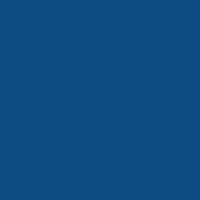

In [3]:
canvas

Awesome! Now we can _draw_ -- and we'll draw a square in the middle of our square (at a size of `100px x 100px`) using the official Allegheny gold: `(254, 218, 72)`. The big problem now: how do we place it?

Recall that we now have a grid system that is 200 pixels by 200 pixels:

![Hip to be a square](https://cs.allegheny.edu/sites/dluman/cmpsc100/cmpsc-100-pantone-grid.png)

We can view this as a coordinate system and place our square accordingly. Keep in mind, however, that the _origin_ -- that is, point `(0,0)` -- is actually at the _upper left_.

To do this:

```python
# Enable drawing on our image; create as "draw" object
draw = ImageDraw.Draw(canvas)
# Draw a rectangle at exact center -- this requires math I've done for you
draw.rectangle(
    (
        (50,50),       # <-- origin (i.e. starting point)
        (150,150)      # <-- terminal (i.e. ending point)
    ),
    fill=(254,218,72)  # <-- fill color as R,G,B
)
```

### 3. Create a rectangle with an origin point at `(25,25)` and a terminal point at `(175,175)` with a fill of `(254,218,72)`

In [4]:
# Enable drawing on our image; create as "draw" object
draw = ImageDraw.Draw(canvas)
# Draw a rectangle at exact center -- this requires math I've done for you
draw.rectangle(
    (
        (25,25),       # <-- origin (i.e. starting point)
        (175,175)      # <-- terminal (i.e. ending point)
    ),
    fill=(254,218,72)  # <-- fill color as R,G,B
)

Of course, we can make other shapes, too. And, of course we're going to do that -- a circle in this case. However, we need to observe the geometrical rule that circles are really just _special ellipses_.

```python
draw.ellipse(
    (25,25,175,175), # <-- x1, y1, x2, y2
    fill=(15,76,129) # <-- fill color as R,G,B
)
```

### 4. Draw an ellipse with points at `(50,50,150,150)` with a fill of `(15, 76, 129)`

In [5]:
draw.ellipse(
    (50,50,150,150), # <-- x1, y1, x2, y2
    fill=(15,76,129) # <-- fill color as R,G,B
)

Lastly, let's save our image -- like anything in Python, we can't keep it if we don't store it. In this case, we're going to store it as a file, doing so using the `save` method of the `Image` object we've created: `canvas`

```python
#            Replace with correct file name
#                |
canvas.save("FILE NAME", "PNG")
```

### 5 Save your image as `worksheet_0_image.png` below

In [6]:
canvas.save("worksheet_0_image.png")

### 6. To prove that you've saved it, show the image using a Markdown image tag below.

!["Solution"](worksheet_0_image.png)